# Results visualization

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
networks = ["ecoli", "yeast", "gs0.01", "gs0.1", "gs1"]
distribution = dict.fromkeys(networks)
for network in networks:
    distribution[network] = json.load(open(f"./networks/{network}/counter.json"))

In [3]:
def plot_distr(network, title, figsize=(15, 6)):
    distr = distribution[network]
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=20)
    plt.grid()
    plt.bar(distr.keys(), distr.values(), width=0.3);

### Motifs library

There are conventional denotations for all possible triads as presented below

<img src="./pics/triads.png" width=2000 height=20/>

# Yeast Tnet

021C      37631
021D    1059856
021U      26042
030C          8
030T       3370
dtype: int64


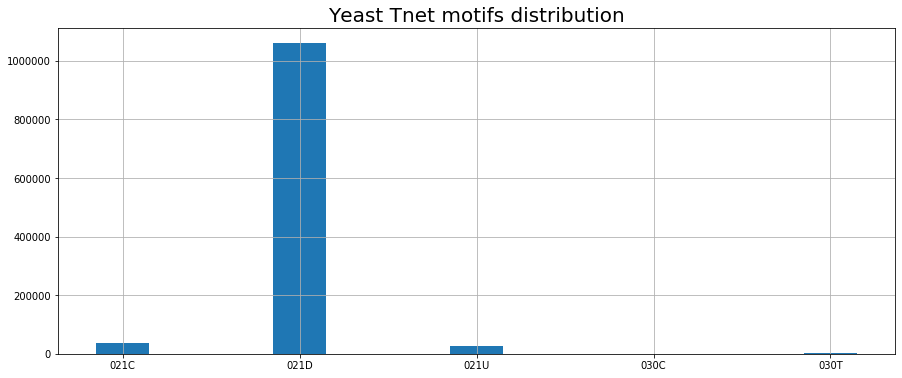

In [4]:
print(pd.Series(distribution["yeast"]))
plot_distr("yeast", "Yeast Tnet motifs distribution")

# E. coli

021C      3938
021D    329287
021U      4365
030C         0
030T      1392
dtype: int64


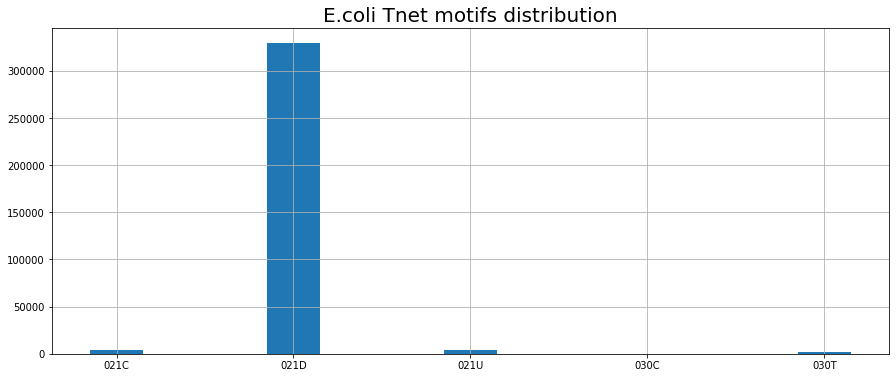

In [5]:
print(pd.Series(distribution["ecoli"]))
plot_distr("ecoli", "E.coli Tnet motifs distribution")

# Gene Spyder, different SNR

In [6]:
gs_results = pd.DataFrame(index=range(5*3), columns=["network", "motif", "number"])
i = 0
for net in ["gs0.01", "gs0.1", "gs1"]:
    for motif, number in distribution[net].items():
        gs_results.iloc[i, :] = [net, motif, number]
        i += 1   
df = pd.DataFrame(index=gs_results.motif.unique())
for net in ["gs0.01", "gs0.1", "gs1"]:
    df[net] = gs_results[gs_results["network"] == net]["number"].values
df

,gs0.01,gs0.1,gs1
021C,8741,9459,8626
021D,4709,5261,4702
021U,3816,4079,3666
030C,14,17,17
030T,51,73,58


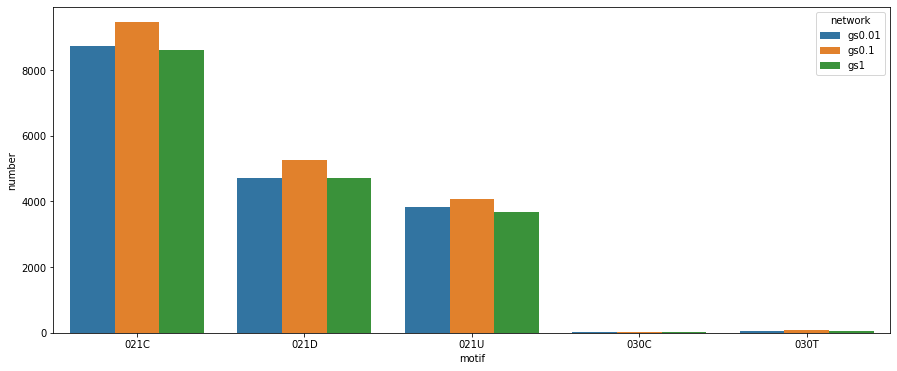

In [7]:
plt.figure(figsize=(15, 6))
sns.barplot(data=gs_results, x="motif", y="number", hue="network");